# Siamese Network 
Builiding a siamese network as per paper Siamese Neural Networks for One-shot Image Recognition given in http://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf 

In [4]:
# ML/ DL limbraries
from keras.layers import Input, Conv2D, Lambda, merge, Dense, Flatten, MaxPooling2D
from keras.models import Sequential, Model
from keras.regularizers import l2
from keras.optimizers import SGD, Adam
from keras import backend as K
from keras.losses import binary_crossentropy
import numpy as np

/home/apurvnit/anaconda3/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
# Visualization libraries 
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [16]:
# Other Libraries
from sklearn.utils import shuffle
import os
import pickle
from PIL import Image
import cv2

## Model

Originally the model was made for performing one-shot learning for learning good features on Omniglot dataset https://github.com/brendenlake/omniglot which is a collection of 1623 hand drawn characters from 50 alphabets for every character there are only just 20 examples . Therefore this problem is best suited to be solved by one shot learning because very less amount of data it has

In [9]:
input_shape = (105,105,1)


In [10]:
def w_init(shape, name=None):
    values = np.random.normal(loc=0, scale=1e-2,size=shape)
    return K.variable(values, name=name)

In [11]:
def b_init(shape, name=None):
    values = np.random.normal(loc=0.5, scale=1e-2, size=shape)
    return K.variable(values, name=name)

In [15]:
def design_model(input_shape=(105,105,1)):
    
    model = Sequential()
#     1
    model.add(Conv2D(64,(10,10), activation= 'relu', input_shape=input_shape, kernel_initializer=w_init,
                     bias_initializer=b_init, kernel_regularizer=l2(2e-4)))
#     2
    model.add(MaxPooling2D())

#     3
    model.add(Conv2D(128,(7,7), activation= 'relu', kernel_initializer=w_init,
                     bias_initializer=b_init, kernel_regularizer=l2(2e-4)))
    
#     4
    model.add(MaxPooling2D())
    
#     5
    model.add(Conv2D(128,(4,4), activation= 'relu', kernel_initializer=w_init,
                     bias_initializer=b_init, kernel_regularizer=l2(2e-4)))
#     6
    model.add(MaxPooling2D())
    
#     7
    model.add(Conv2D(256,(7,7), activation= 'relu', kernel_initializer=w_init,
                     bias_initializer=b_init, kernel_regularizer=l2(2e-4)))
    
#     8
    model.add(Flatten())
    model.add(Dense(4096, activation=sigmoid,kernel_regularizer=l2(1e-3),kernel_initializer=w_init,bias_initializer=b_init))
    
    return model

In [2]:
def distance(unknown_encoding, known_encoding):
    
    if len(unknown_encoding) == 0:
        return np.empty((0))
    
    return np.linalg.norm(unknown_encoding - known_encoding, axis = 1)

In [3]:
def load_image(path):
#     make the image type = rgb
    img = Image.open(path)
    img = img.convert('RGB')
    return np.array(img)

In [24]:
def transform_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = 
    return img

In [8]:
img = load_image("useless/pp.jpeg")

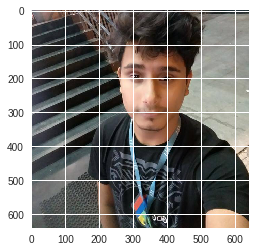

In [10]:
plt.imshow(img)

In [25]:
img1 = transform_image(img)
plt.imshow(img1)

ValueError: cannot reshape array of size 409600 into shape (105,105)

(640, 640, 3)